# Mastering the Process of Data Science 2020/21

#### 4th Notebook

#### Abduvosid Malikov

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats

Drinks.csv: number of alcohol servings per capita per year for 15 years of age or older (for beer, wine and spirit) across various countries

In [2]:
drinks_life_expectancy = pd.read_csv('data/Drinks_Life_expectancy.csv')

In [3]:
drinks_life_expectancy.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,GhoCode,GhoDisplay,PublishStateCode,PublishStateDisplay,YearCode,...,RegionCode,RegionDisplay,WorldBankIncomeGroupGroupCode,WorldBankIncomeGroupDisplay,CountryCode,CountryDisplay,SexCode,SexDisplay,DisplayValue,Numeric
0,Afghanistan,0,0,0,0.0000,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2012,...,EMR,Eastern Mediterranean,WB_LI,Low_income,AFG,Afghanistan,BTSX,Both sexes,60,60.0
1,Albania,89,132,54,4.8675,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2012,...,EUR,Europe,WB_LMI,Lower_middle_income,ALB,Albania,BTSX,Both sexes,74,74.0
2,Algeria,25,0,14,0.6903,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2012,...,AFR,Africa,WB_UMI,Upper_middle_income,DZA,Algeria,BTSX,Both sexes,72,72.0
3,Andorra,245,138,312,12.3015,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2012,...,EUR,Europe,WB_HI,High_income,AND,Andorra,BTSX,Both sexes,83,83.0
4,Angola,217,57,45,5.6463,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2012,...,AFR,Africa,WB_LMI,Lower_middle_income,AGO,Angola,BTSX,Both sexes,51,51.0


##### Calculate correlation between expected lifetime and total liters of pure alcohol

In [4]:
def histogram_intersection(a, b):
    v = np.minimum(a, b).sum().round(decimals=1)
    return v

In [5]:
# drinks_life_expectancy['total_litres_of_pure_alcohol'].corr(drinks_life_expectancy['DisplayValue'], method=histogram_intersection)

In [6]:
result = np.corrcoef(drinks_life_expectancy['total_litres_of_pure_alcohol'], drinks_life_expectancy['DisplayValue'])

In [7]:
result

array([[1.        , 0.52405524],
       [0.52405524, 1.        ]])

corrcoef() returns the correlation matrix, which is a two-dimensional array with the correlation coefficients.

lower left and upper right values of the correlation matrix are equal and both represent the Pearson correlation coefficient for Total litres of pure alcohol and Life expectancy. It’s approximately **52**

Pearson’s coefficient measures linear correlation. The value is more than zero which indicates positive correlation between Total litres of pure alcohol and Life expectancy.

Even though the correlation between these two variables is positive, it's not strong. So we can't conclude higher Total litres of pure alcohol corresponds to a higher Life expectancy.

In [8]:
slope, intercept, r, p, stderr = scipy.stats.linregress(drinks_life_expectancy['total_litres_of_pure_alcohol'], 
                                                        drinks_life_expectancy['DisplayValue'])

In [9]:
y = drinks_life_expectancy['DisplayValue']

In [10]:
x = drinks_life_expectancy['total_litres_of_pure_alcohol']

In [11]:
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'

Let's visualize the regression line: 

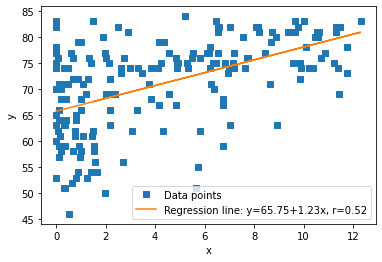

In [12]:
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='s', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(facecolor='white')
plt.show()

##### Read and prepare CountriesOfTheWorld.xlsx

CountriesOfTheWorld.xlsx: geographical and socio-econometric data across various countries

In [13]:
countries = pd.read_excel('data/CountriesOfTheWorld.xls', skiprows=[0,1,2,4])

In [14]:
countries.head()

,Country,Region,Population,Area,Pop. Density,Coastline,Net migration,Infant mortality,GDP,Literacy,Phones,Arable,Crops,Other,Birthrate,Deathrate
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,47.96,0.00,23.06,163.07,700.0,36.0,3.22,12.13,0.22,87.65,46.60,20.34
1,Albania,EASTERN EUROPE,3581655,28748,124.59,1.26,-4.93,21.52,4500.0,86.5,71.20,21.09,4.42,74.49,15.11,5.22
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.83,0.04,-0.39,31.00,6000.0,70.0,78.10,3.22,0.25,96.53,17.14,4.61
3,American Samoa,OCEANIA,57794,199,290.42,58.29,-20.71,9.27,8000.0,97.0,259.54,10.00,15.00,75.00,22.46,3.27
4,Andorra,WESTERN EUROPE,71201,468,152.14,0.00,6.60,4.05,19000.0,100.0,497.18,2.22,0.00,97.78,8.71,6.25


##### Merge countries of the world data and the previously prepared data (containing total liters of pure alcohol and expected lifetime)

In [15]:
countries_drink_life_e = pd.merge(countries, drinks_life_expectancy, left_on='Country', right_on = 'country')

In [16]:
countries_drink_life_e

,Country,Region,Population,Area,Pop. Density,Coastline,Net migration,Infant mortality,GDP,Literacy,...,RegionCode,RegionDisplay,WorldBankIncomeGroupGroupCode,WorldBankIncomeGroupDisplay,CountryCode,CountryDisplay,SexCode,SexDisplay,DisplayValue,Numeric


When we merge, we get 0 rows. This is strange. Country names in Country column of countries dataset and country names in country column in drinks_life_expectancy match. But they didn't merge. When we investigate country names in Country column of countries dataset, we see that there is a space after the country name. Therefore 'Albania ' didn't match with 'Albania'. Let's remove the space. 

In [17]:
countries.Country.to_list()[:10]

['Afghanistan ',
 'Albania ',
 'Algeria ',
 'American Samoa ',
 'Andorra ',
 'Angola ',
 'Anguilla ',
 'Antigua & Barbuda ',
 'Argentina ',
 'Armenia ']

In [18]:
countries['Country'] = countries['Country'].str.strip()

In [19]:
countries_drink_life_e = pd.merge(countries, drinks_life_expectancy, left_on='Country', right_on = 'country')

In [78]:
countries_drink_life_e.head()

,Country,Region,Population,Area,Pop. Density,Coastline,Net migration,Infant mortality,GDP,Literacy,...,Birthrate,Deathrate,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,RegionDisplay,WorldBankIncomeGroupDisplay,CountryDisplay,DisplayValue
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,47.96,0.00,23.06,163.07,700.0,36.0,...,46.60,20.34,0,0,0,0.0000,Eastern Mediterranean,Low_income,Afghanistan,60
1,Albania,EASTERN EUROPE,3581655,28748,124.59,1.26,-4.93,21.52,4500.0,86.5,...,15.11,5.22,89,132,54,4.8675,Europe,Lower_middle_income,Albania,74
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.83,0.04,-0.39,31.00,6000.0,70.0,...,17.14,4.61,25,0,14,0.6903,Africa,Upper_middle_income,Algeria,72
3,Andorra,WESTERN EUROPE,71201,468,152.14,0.00,6.60,4.05,19000.0,100.0,...,8.71,6.25,245,138,312,12.3015,Europe,High_income,Andorra,83
4,Angola,SUB-SAHARAN AFRICA,12127071,1246700,9.73,0.13,0.00,191.19,1900.0,42.0,...,45.11,24.20,217,57,45,5.6463,Africa,Lower_middle_income,Angola,51


In [21]:
len(list(set(countries.Country.to_list() ) - set(drinks_life_expectancy.country.to_list())))

67

In [22]:
sorted(list(set(countries.Country.to_list() ) - set(drinks_life_expectancy.country.to_list())))

['American Samoa',
 'Anguilla',
 'Antigua & Barbuda',
 'Aruba',
 'Bahamas, The',
 'Bermuda',
 'Bolivia',
 'Bosnia & Herzegovina',
 'British Virgin Is.',
 'Brunei',
 'Burma',
 'Cape Verde',
 'Cayman Islands',
 'Central African Rep.',
 'Congo, Dem. Rep.',
 'Congo, Repub. of the',
 "Cote d'Ivoire",
 'East Timor',
 'Faroe Islands',
 'French Guiana',
 'French Polynesia',
 'Gambia, The',
 'Gaza Strip',
 'Gibraltar',
 'Greenland',
 'Guadeloupe',
 'Guam',
 'Guernsey',
 'Guinea-Bissau',
 'Hong Kong',
 'Iran',
 'Isle of Man',
 'Jersey',
 'Korea, North',
 'Korea, South',
 'Laos',
 'Liechtenstein',
 'Macau',
 'Macedonia',
 'Martinique',
 'Mayotte',
 'Micronesia, Fed. St.',
 'Moldova',
 'Montserrat',
 'N. Mariana Islands',
 'Netherlands Antilles',
 'New Caledonia',
 'Puerto Rico',
 'Reunion',
 'Russia',
 'Saint Helena',
 'Saint Kitts & Nevis',
 'Sao Tome & Principe',
 'St Pierre & Miquelon',
 'Syria',
 'Taiwan',
 'Tanzania',
 'Trinidad & Tobago',
 'Turks & Caicos Is',
 'United Kingdom',
 'United St

In [23]:
[match for match in drinks_life_expectancy.country.to_list() if "Macau" in match]      

[]

In [24]:
[match for match in drinks_life_expectancy.country.to_list() if "Helena" in match]      

[]

In [25]:
[match for match in drinks_life_expectancy.country.to_list() if "Gibraltar" in match]      

[]

In [26]:
[match for match in drinks_life_expectancy.country.to_list() if "Rico" in match]      

[]

In [27]:
[match for match in drinks_life_expectancy.country.to_list() if "French" in match]      

[]

In [28]:
[match for match in drinks_life_expectancy.country.to_list() if "Guernsey" in match]      

[]

In [29]:
[match for match in drinks_life_expectancy.country.to_list() if "Guinea" in match]      

['Equatorial Guinea', 'Guinea', 'Guinea_Bissau', 'Papua New Guinea']

In [30]:
[match for match in drinks_life_expectancy.country.to_list() if "Moldova" in match]      

['Republic of Moldova']

In [31]:
[match for match in drinks_life_expectancy.country.to_list() if "Taiwan" in match]      

[]

In [32]:
[match for match in drinks_life_expectancy.country.to_list() if "Verde" in match]      

['Cabo Verde']

In [33]:
[match for match in drinks_life_expectancy.country.to_list() if "Netherlands" in match]      

['Netherlands']

In [34]:
[match for match in drinks_life_expectancy.country.to_list() if "Congo" in match]      

['Congo', 'Democratic Republic of the Congo']

In [35]:
[match for match in drinks_life_expectancy.country.to_list() if "Tome" in match]      

['Sao Tome and Principe']

In [36]:
[match for match in countries.Country.to_list() if "Tome" in match]      

['Sao Tome & Principe']

In [37]:
[match for match in drinks_life_expectancy.country.to_list() if "Bolivia" in match]      

['Bolivia (Plurinational State of)']

Let's make country names similar so that it will be easy to merge them

In [38]:
row_n = countries[countries['Country'] == "United States"].index
countries.at[row_n, 'Country'] = 'United States of America'

In [39]:
row_n = countries[countries['Country'] == "Brunei"].index
countries.at[row_n, 'Country'] = "Brunei Darussalam"

In [40]:
row_n = countries[countries['Country'] == "Russia"].index
countries.at[row_n, 'Country'] = "Russian Federation"

In [41]:
row_n = countries[countries['Country'] == "Bosnia & Herzegovina"].index
countries.at[row_n, 'Country'] = "Bosnia and Herzegovina"

In [42]:
row_n = countries[countries['Country'] == "Bosnia & Herzegovina"].index
countries.at[row_n, 'Country'] = "Bosnia and Herzegovina"

In [43]:
row_n = countries[countries['Country'] == "East Timor"].index
countries.at[row_n, 'Country'] = "Timor_Leste"

In [44]:
row_n = countries[countries['Country'] == "Moldova"].index
countries.at[row_n, 'Country'] = "Republic of Moldova"

In [45]:
row_n = countries[countries['Country'] == "Cape Verde"].index
countries.at[row_n, 'Country'] = "Cabo Verde"

In [46]:
row_n = countries[countries['Country'] == "Micronesia, Fed. St."].index
countries.at[row_n, 'Country'] = "Micronesia (Federated States of)"

In [47]:
row_n = countries[countries['Country'] == "Saint Kitts & Nevis"].index
countries.at[row_n, 'Country'] = "Saint Kitts and Nevis"

In [48]:
row_n = countries[countries['Country'] == "United Kingdom"].index
countries.at[row_n, 'Country'] = "United Kingdom of Great Britain and Northern Ireland"

In [49]:
row_n = countries[countries['Country'] == "Cote d'Ivoire"].index
countries.at[row_n, 'Country'] = "Côte d'Ivoire"

In [50]:
row_n = countries[countries['Country'] == "Korea, South"].index
countries.at[row_n, 'Country'] = "Republic of Korea"

In [51]:
row_n = countries[countries['Country'] == "Iran"].index
countries.at[row_n, 'Country'] = "Iran (Islamic Republic of)"

In [52]:
row_n = countries[countries['Country'] == "Trinidad & Tobago"].index
countries.at[row_n, 'Country'] = "Trinidad and Tobago"

In [53]:
row_n = countries[countries['Country'] == "Vietnam"].index
countries.at[row_n, 'Country'] = "Viet Nam"

In [54]:
row_n = countries[countries['Country'] == "Macedonia"].index
countries.at[row_n, 'Country'] = "The former Yugoslav republic of Macedonia"

In [55]:
row_n = countries[countries['Country'] == "Antigua & Barbuda"].index
countries.at[row_n, 'Country'] = "Antigua and Barbuda"

In [56]:
row_n = countries[countries['Country'] == "Korea, North"].index
countries.at[row_n, 'Country'] = "Democratic People's Republic of Korea"

In [57]:
row_n = countries[countries['Country'] == "Brunei"].index
countries.at[row_n, 'Country'] = "Brunei Darussalam"

In [58]:
row_n = countries[countries['Country'] == "Gambia, The"].index
countries.at[row_n, 'Country'] = "Gambia"

In [59]:
row_n = countries[countries['Country'] == "Central African Rep."].index
countries.at[row_n, 'Country'] = "Central African Republic"

In [60]:
row_n = countries[countries['Country'] == "Congo, Repub. of the"].index
countries.at[row_n, 'Country'] = "Congo"

In [61]:
row_n = countries[countries['Country'] == "Venezuela"].index
countries.at[row_n, 'Country'] = "Venezuela (Bolivarian Republic of)"

In [62]:
row_n = countries[countries['Country'] == "Laos"].index
countries.at[row_n, 'Country'] = "Lao People's Democratic Republic"

In [63]:
row_n = countries[countries['Country'] == "Tanzania"].index
countries.at[row_n, 'Country'] = "United Republic of Tanzania"

In [64]:
row_n = countries[countries['Country'] == "Sao Tome & Principe"].index
countries.at[row_n, 'Country'] = "Sao Tome and Principe"

In [65]:
row_n = countries[countries['Country'] == "Syria"].index
countries.at[row_n, 'Country'] = "Syrian Arab Republic"

In [66]:
row_n = countries[countries['Country'] == "Bolivia"].index
countries.at[row_n, 'Country'] = "Bolivia (Plurinational State of)"

In [67]:
countries.iloc[row_n]

,Country,Region,Population,Area,Pop. Density,Coastline,Net migration,Infant mortality,GDP,Literacy,Phones,Arable,Crops,Other,Birthrate,Deathrate
24,Bolivia (Plurinational State of),LATIN AMER. & CARIB,8989046,1098580,8.18,0.0,-1.32,53.11,2400.0,87.2,71.9,2.67,0.19,97.14,23.3,7.53


In [68]:
countries_drink_life_e = pd.merge(countries, drinks_life_expectancy, left_on='Country', right_on = 'country')

In [79]:
countries_drink_life_e.head()

,Country,Region,Population,Area,Pop. Density,Coastline,Net migration,Infant mortality,GDP,Literacy,...,Birthrate,Deathrate,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,RegionDisplay,WorldBankIncomeGroupDisplay,CountryDisplay,DisplayValue
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,47.96,0.00,23.06,163.07,700.0,36.0,...,46.60,20.34,0,0,0,0.0000,Eastern Mediterranean,Low_income,Afghanistan,60
1,Albania,EASTERN EUROPE,3581655,28748,124.59,1.26,-4.93,21.52,4500.0,86.5,...,15.11,5.22,89,132,54,4.8675,Europe,Lower_middle_income,Albania,74
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.83,0.04,-0.39,31.00,6000.0,70.0,...,17.14,4.61,25,0,14,0.6903,Africa,Upper_middle_income,Algeria,72
3,Andorra,WESTERN EUROPE,71201,468,152.14,0.00,6.60,4.05,19000.0,100.0,...,8.71,6.25,245,138,312,12.3015,Europe,High_income,Andorra,83
4,Angola,SUB-SAHARAN AFRICA,12127071,1246700,9.73,0.13,0.00,191.19,1900.0,42.0,...,45.11,24.20,217,57,45,5.6463,Africa,Lower_middle_income,Angola,51


Now we get 187 rows when merged, not 160 rows as it was previously

###### Find factors that are highly correlated to the expected lifetime

In [70]:
countries_drink_life_e.columns

Index(['Country', 'Region', 'Population', 'Area', 'Pop. Density', 'Coastline',
       'Net migration', 'Infant mortality', 'GDP', 'Literacy', 'Phones',
       'Arable', 'Crops', 'Other', 'Birthrate', 'Deathrate', 'country',
       'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'GhoCode', 'GhoDisplay',
       'PublishStateCode', 'PublishStateDisplay', 'YearCode', 'YearDisplay',
       'RegionCode', 'RegionDisplay', 'WorldBankIncomeGroupGroupCode',
       'WorldBankIncomeGroupDisplay', 'CountryCode', 'CountryDisplay',
       'SexCode', 'SexDisplay', 'DisplayValue', 'Numeric'],
      dtype='object')

We will see a correlation table. But before that, let's get rid of columns that has no meaning and does not give any message in the correlation table.

In [71]:
columns_to_drop = ['country', 'GhoCode', 'GhoDisplay', 'PublishStateCode', 'PublishStateDisplay', 'YearCode', 'YearDisplay', 'RegionCode', 'WorldBankIncomeGroupGroupCode', 'CountryCode', 'SexCode', 'SexDisplay', 'Numeric']

In [72]:
countries_drink_life_e.drop(columns_to_drop,  axis='columns', inplace=True)

In [73]:
countries_drink_life_e.columns

Index(['Country', 'Region', 'Population', 'Area', 'Pop. Density', 'Coastline',
       'Net migration', 'Infant mortality', 'GDP', 'Literacy', 'Phones',
       'Arable', 'Crops', 'Other', 'Birthrate', 'Deathrate', 'beer_servings',
       'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol',
       'RegionDisplay', 'WorldBankIncomeGroupDisplay', 'CountryDisplay',
       'DisplayValue'],
      dtype='object')

Now we have variables from two datasets. To find the variables that are highly correlated with each other, we use Person's correlation coefficient. 

In [74]:
pearsoncorr = countries_drink_life_e.corr(method='pearson')

In [75]:
def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for values
    more than 0.8, black otherwise.
    """
    color = 'red' if val > 0.7 else 'black'
    return 'color: % s' % color

The closer is the Person's correlation coefficient to 1 - the stronger is the relationship between two variables. 

In [76]:
# displaying the DataFrame
pearsoncorr.style.applymap(color_negative_red)

,Population,Area,Pop. Density,Coastline,Net migration,Infant mortality,GDP,Literacy,Phones,Arable,Crops,Other,Birthrate,Deathrate,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,DisplayValue
Population,1.000000,0.464225,-0.014876,-0.052397,0.019796,-0.006621,-0.017257,-0.027697,0.014356,0.181148,-0.066458,-0.113551,-0.073325,-0.055873,-0.043054,0.090884,-0.066615,-0.008085,0.012294
Area,0.464225,1.000000,-0.056918,-0.072937,0.096136,-0.052732,0.116590,0.066887,0.136186,-0.098235,-0.152397,0.159500,-0.109935,0.006095,0.160762,0.172090,0.021826,0.159097,0.036881
Pop. Density,-0.014876,-0.056918,1.000000,0.205896,0.195239,-0.116275,0.182475,0.085916,0.329991,-0.048593,-0.025383,0.052916,-0.134482,-0.013536,-0.097358,-0.081644,-0.057457,-0.103768,0.157231
Coastline,-0.052397,-0.072937,0.205896,1.000000,-0.283861,-0.082161,-0.034335,0.077271,0.060366,-0.098124,0.416647,-0.136230,-0.019777,-0.118909,-0.030081,-0.047012,-0.064406,-0.059124,0.050117
Net migration,0.019796,0.096136,0.195239,-0.283861,1.000000,0.021039,0.408698,-0.063532,0.224548,-0.036066,-0.382163,0.227783,-0.036771,0.106628,0.002605,-0.241164,0.206226,-0.020485,0.119022
Infant mortality,-0.006621,-0.052732,-0.116275,-0.082161,0.021039,1.000000,-0.590683,-0.748959,-0.668581,-0.166931,-0.091874,0.184302,0.852009,0.640203,-0.452804,-0.402177,-0.408400,-0.543985,-0.861611
GDP,-0.017257,0.116590,0.182475,-0.034335,0.408698,-0.590683,1.000000,0.503040,0.852894,0.076138,-0.194773,0.038922,-0.631378,-0.177819,0.471746,0.163373,0.623049,0.536816,0.678532
Literacy,-0.027697,0.066887,0.085916,0.077271,-0.063532,-0.748959,0.503040,1.000000,0.590804,0.128796,0.089232,-0.149711,-0.783138,-0.346736,0.513941,0.461468,0.410998,0.603487,0.683107
Phones,0.014356,0.136186,0.329991,0.060366,0.224548,-0.668581,0.852894,0.590804,1.000000,0.150618,-0.111233,-0.065248,-0.730341,-0.229731,0.482614,0.323055,0.573499,0.591989,0.734936
Arable,0.181148,-0.098235,-0.048593,-0.098124,-0.036066,-0.166931,0.076138,0.128796,0.150618,1.000000,0.072859,-0.855311,-0.255504,0.031981,0.195820,0.246024,0.199232,0.275282,0.124476


In our case, the Birthrate and Infant mortality shows very strong correlations, it's equal to 0.8520.

The diagonal line is the correlation of the variables to themselves — so they’ll obviously be 1.

GDP and Phones also have high correlation: 0.8529. The higher the GDP, the more Phones people buy. 

Correlation between GDP and Life expectancy is high, it is 0.68. 

Life expectancy and Phones also have high correlation: 0.7349. We already know that countries with high GDP have high Life expectancy as well. So high GDP of country makes it more affordable for people to buy a phone. Life expectancy also highly negatively correlated with Infant mortality (-0.861611) and Birthrate (-0.815434). Life expectancy moderately correlated with Literacy: 0.6035. The more literate the person is, the more alcohol he/she drinks? We need more analysis to have such conclusion. 

The highest correlation of Total litres of alcohol is with beer_servings, spirit_servings and wine_servings (0.70, 0.71, 0.87). This is obvious as these are the confouding variables. The highest negative correlation of Total litres of alcohol is with the Birthrate. Does it imply that the more alcohol people drink, the less children they have? Maybe, again we need deeper analysis for that. But we definetely know that alcohol has strong negative effect on fertility. 

Life expectancy and Total litres of alcohol is moderately correlated: 0.52. 


This visualization makes it easier to see the correlation between the variables. 

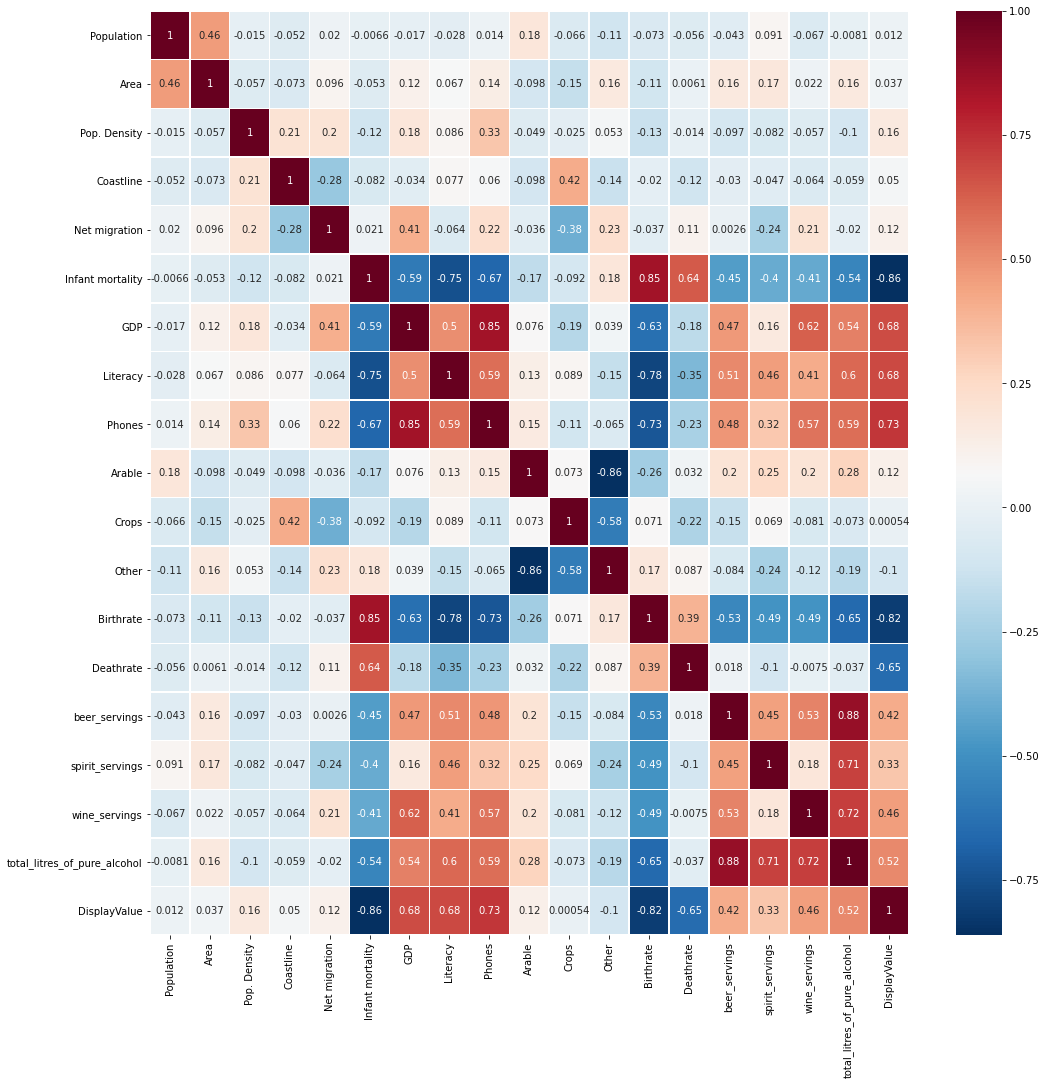

In [77]:
fig, ax = plt.subplots(figsize=(17,17)) 
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

### Summary

This analysis consisted of several steps of working with 3 datasets. First, we calculated total liters of pure alcohol in different drinks. Then we have seen that correlation between expected lifetime and total liters of pure alcohol is positive, but it's not strong. 

We did tons of data preparing work with drinks dataset and countries dataset. This was a good learning point to understand that data can be in the different form and we need to do suitable data pre-processing in order to work with this data consistently. 

Then we found factors that are highly correlated (positively, negatively) to the expected lifetime. 

So, what we learned from this analysis? 

We learned that alcohol consumption can be correlated with the life expectancy and other metrics of the country. But we should keep in mind that correlation does not indicate causation. A correlation quantifies the strength of the relationship between the features of a dataset. Sometimes, the association is caused by a factor common to several features of interest. We should do deeper analysis to find such features. Therefore, the current project is a good starting point to do such analysis. 

### Methodology

Even though steps in this notebook appears in a *sequential* order, in reality I did this project in *iterative* order jumpring from further steps to earlier steps several times. This is indeed inline with CRISP DM methodology.

### Appendix 

#### Calculation

1 serving of wine is equal to 5 ounces. 

5 ounces (1 serving) of wine contains 12 % alcohol. 

5 ounces of wine is equal to 0.1475 litres (5*0.0295). 

1 serving of wine contains 12 % alcohol, that means 

1 serving of wine contains 0.0177 litres of alcohol (12*0.1475/100).

132 servings of wine contains 2.3364 litres of alcohol (89*0.0177)
